<a href="https://www.kaggle.com/code/lalit7881/supply-chain-analysis-dataset-99-100-predictive?scriptVersionId=297261267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-analysis-dataset/supply_chain_data.csv


## Title:
Supply Chain Analysis Dataset

## Description:
This dataset provides comprehensive information for analyzing and optimizing supply chain operations. It includes data on inventory levels, supplier performance, shipment times, order volumes, production schedules, and logistics costs. The dataset can be used to identify bottlenecks, forecast demand, improve supplier relationships, and enhance overall efficiency across the supply chain. It is suitable for data analytics, machine learning modeling, and operational research to support decision-making in procurement, warehousing, and distribution management.

## Import data

In [2]:
df = pd.read_csv("/kaggle/input/supply-chain-analysis-dataset/supply_chain_data.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(100, 24)

In [10]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

In [11]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

## Data visualizations

In [12]:
import plotly.express as px
import plotly.graph_objects as go

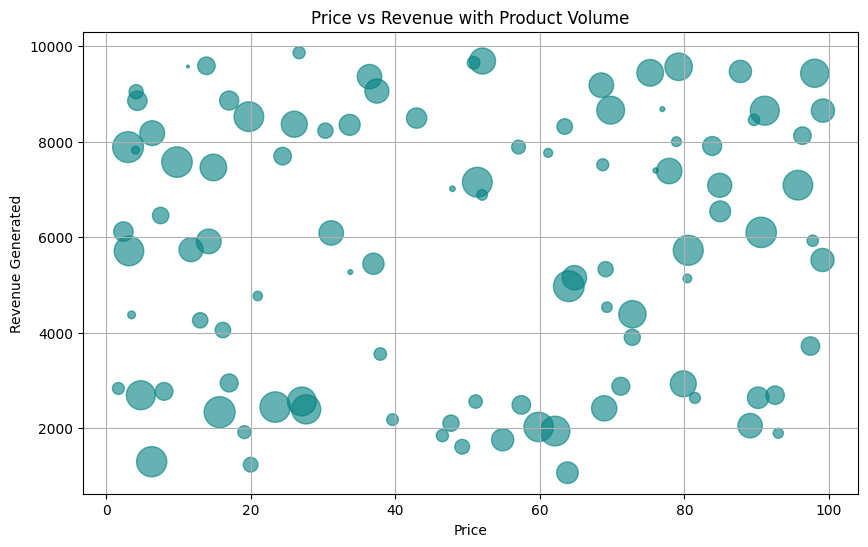

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['Price'], df['Revenue generated'], 
            s=df['Number of products sold']*0.5,  # bubble size proportional to units sold
            alpha=0.6, color='teal')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue with Product Volume')
plt.grid(True)
plt.show()

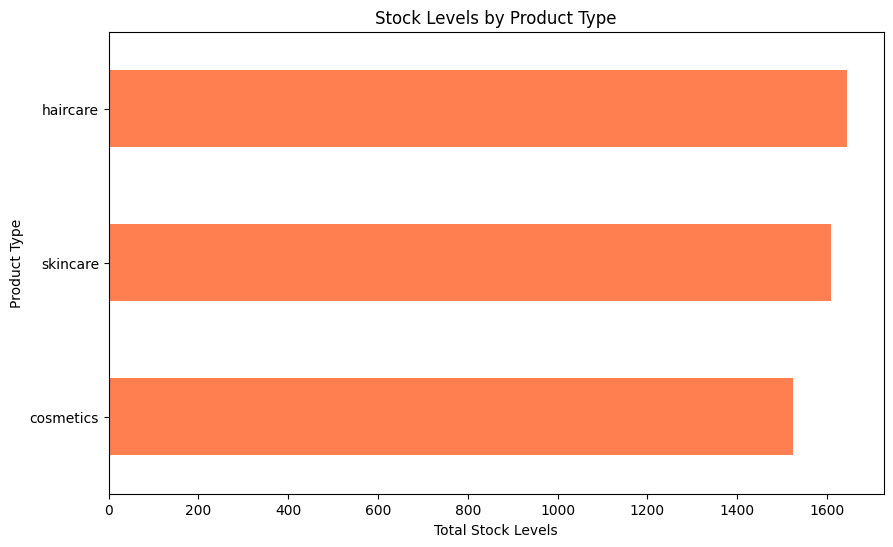

In [14]:
stock_summary = df.groupby('Product type')['Stock levels'].sum().sort_values()
plt.figure(figsize=(10,6))
stock_summary.plot(kind='barh', color='coral')
plt.xlabel('Total Stock Levels')
plt.ylabel('Product Type')
plt.title('Stock Levels by Product Type')
plt.show()

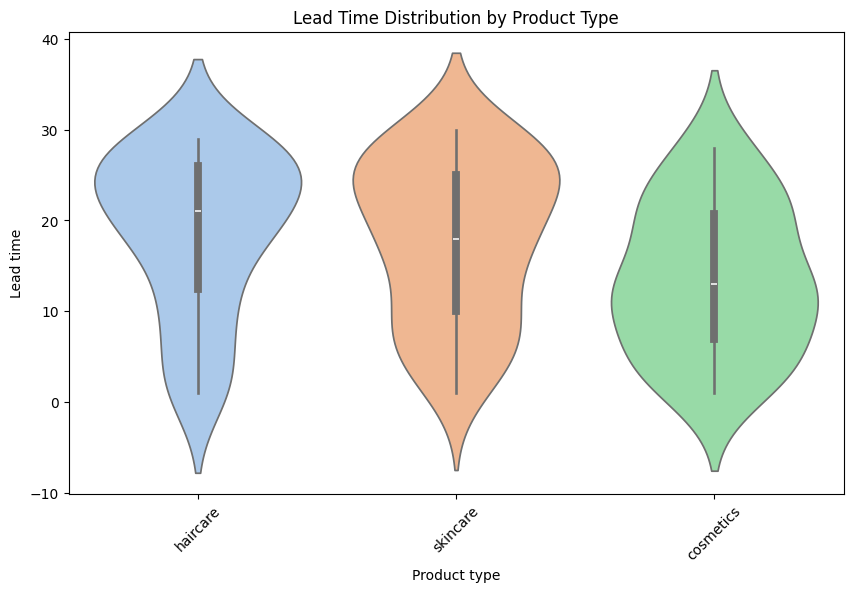

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Product type', y='Lead time', palette='pastel')
plt.xticks(rotation=45)
plt.title('Lead Time Distribution by Product Type')
plt.show()


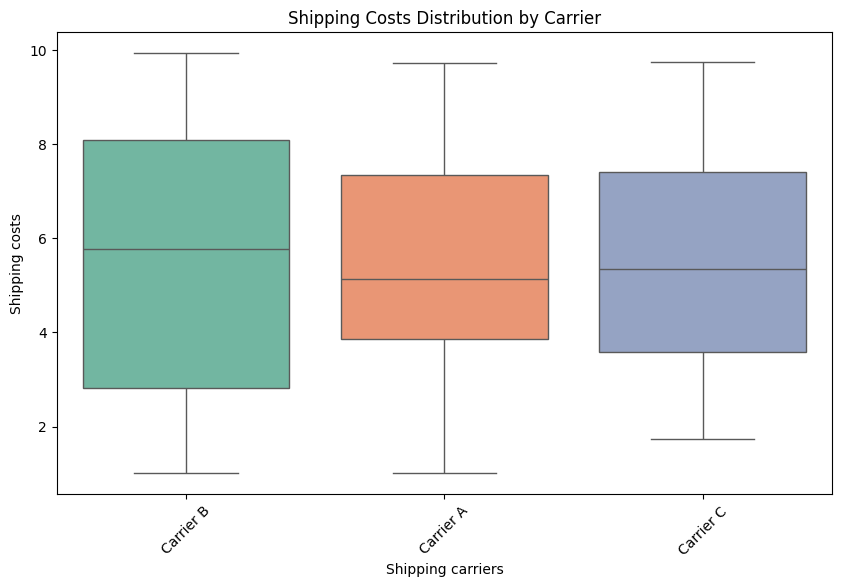

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Shipping carriers', y='Shipping costs', palette='Set2')
plt.xticks(rotation=45)
plt.title('Shipping Costs Distribution by Carrier')
plt.show()

In [17]:
fig = px.scatter_geo(df,
                     locations="Location",
                     locationmode='country names',
                     color="Supplier name",
                     size="Production volumes",
                     hover_name="Supplier name",
                     title="Supplier Locations and Production Volumes")
fig.show()


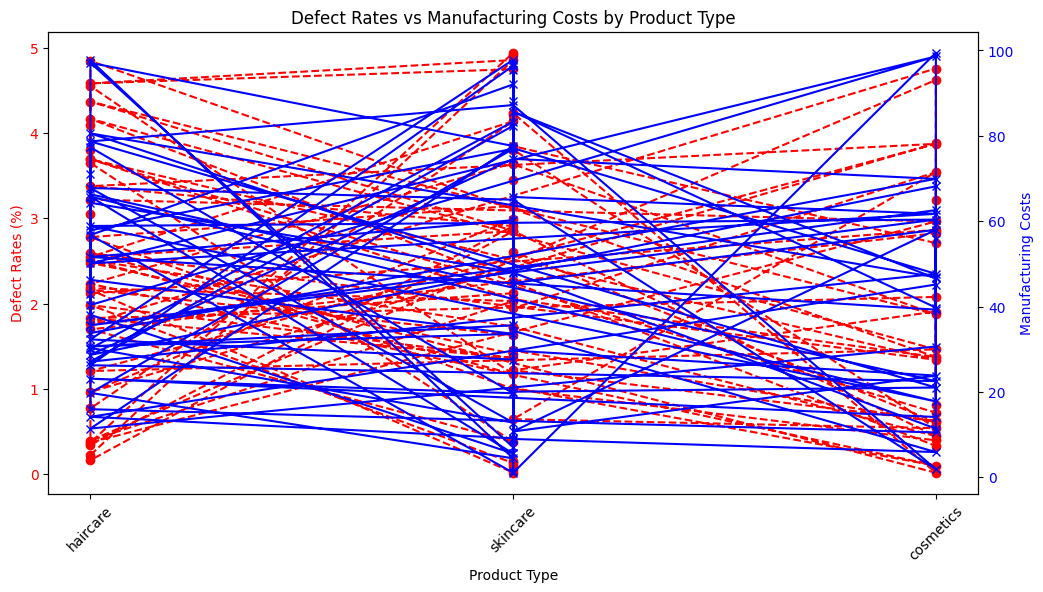

In [18]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Product Type')
ax1.set_ylabel('Defect Rates (%)', color='red')
ax1.plot(df['Product type'], df['Defect rates'], color='red', marker='o', linestyle='--')
ax1.tick_params(axis='y', labelcolor='red')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Manufacturing Costs', color='blue')
ax2.plot(df['Product type'], df['Manufacturing costs'], color='blue', marker='x', linestyle='-')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Defect Rates vs Manufacturing Costs by Product Type')
plt.show()


In [19]:
fig = px.sunburst(df, path=['Customer demographics', 'Product type'], 
                  values='Revenue generated',
                  color='Revenue generated', 
                  color_continuous_scale='Viridis',
                  title='Revenue Distribution by Customer Demographics and Product Type')
fig.show()

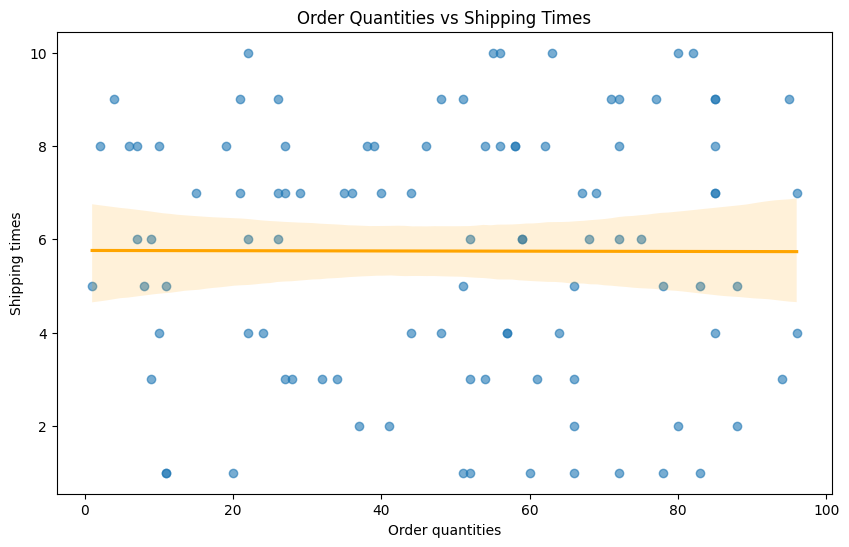

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Order quantities', y='Shipping times', scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('Order Quantities vs Shipping Times')
plt.show()

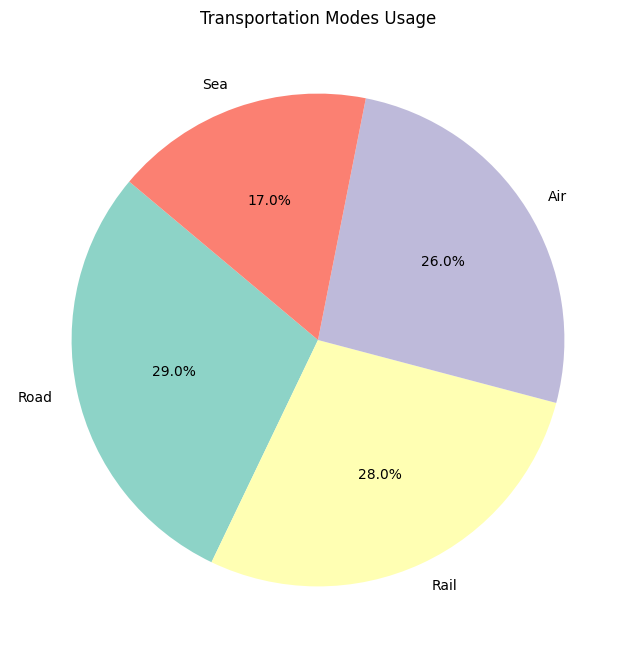

In [21]:
transport_counts = df['Transportation modes'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(transport_counts, labels=transport_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Transportation Modes Usage')
plt.show()

## ML Algo

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [23]:
target_column = 'Revenue generated'
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)
print("Statistical Summary:\n", df.describe())


Dataset Shape: (100, 24)
Missing Values:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
Data Types:
 Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics     

In [24]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

In [25]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [26]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
df['Revenue_log'] = np.log1p(df['Revenue generated'])


In [28]:
df_encoded = pd.get_dummies(df.drop('Revenue generated', axis=1), drop_first=True)

In [29]:
X = df_encoded
y = df['Revenue_log']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [32]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} -> RMSE: {rmse:.2f}, R2: {r2:.2f}")

Random Forest -> RMSE: 0.04, R2: 0.99
Gradient Boosting -> RMSE: 0.04, R2: 1.00
XGBoost -> RMSE: 0.04, R2: 0.99


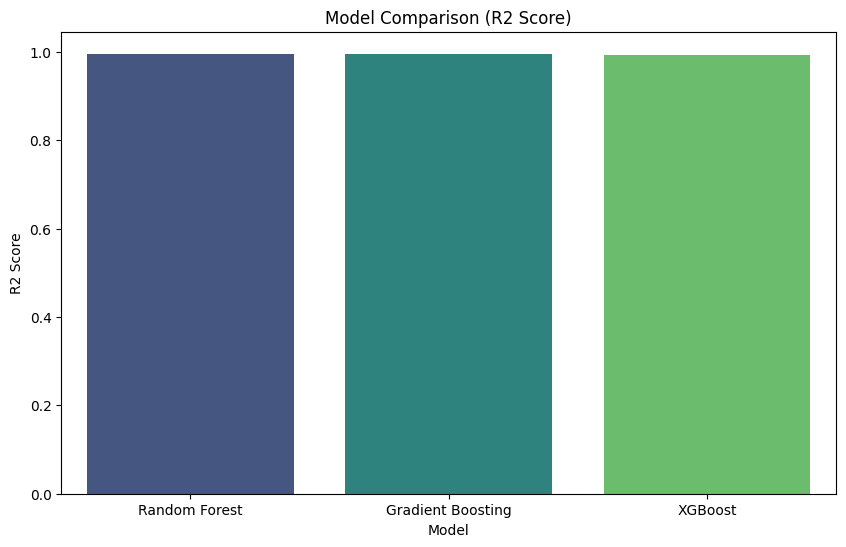

In [33]:
results_df = pd.DataFrame(model_results).T.reset_index().rename(columns={'index':'Model'})
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.show()

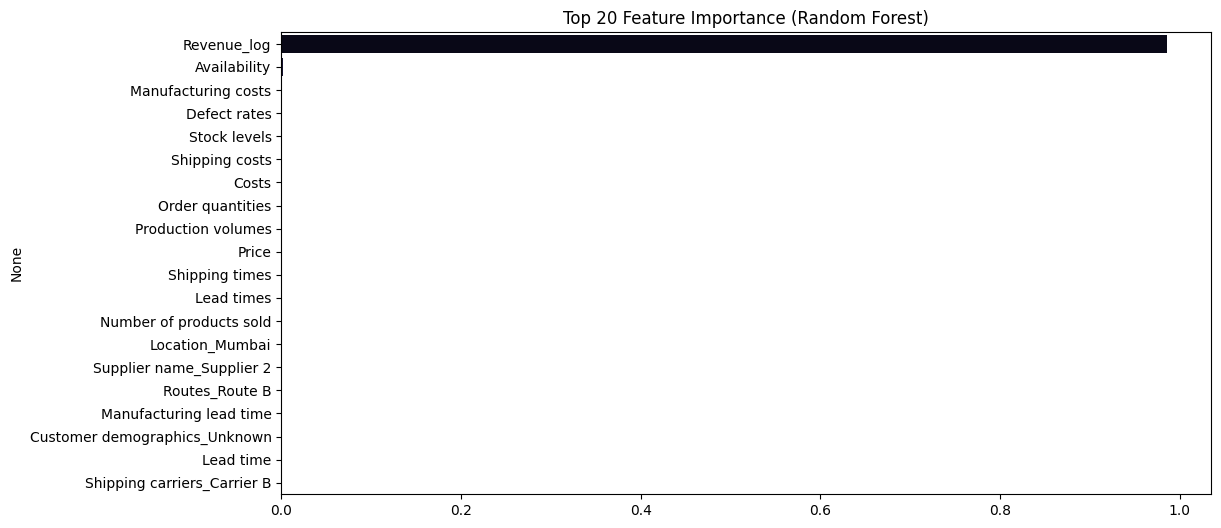

In [34]:
best_model = models['Random Forest']  # choose best based on R2
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(20)  # top 20 features

plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='magma')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.show()

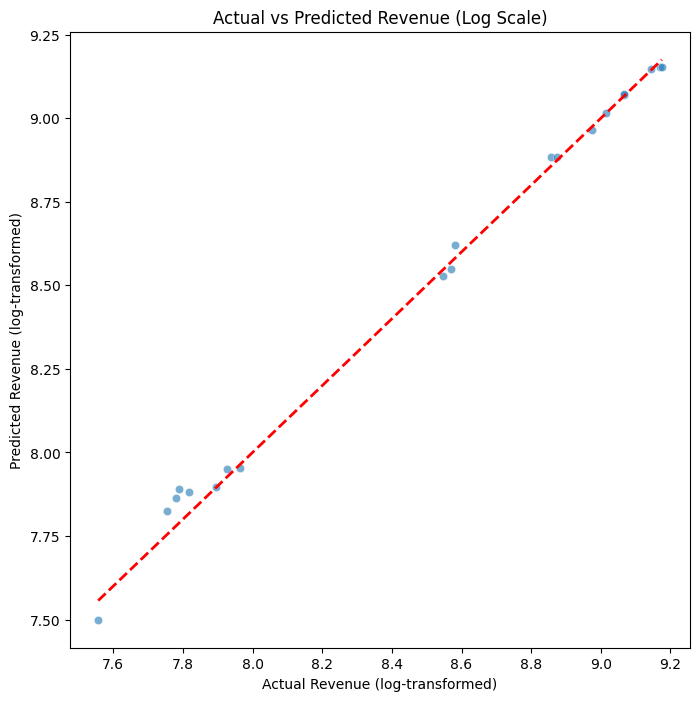

In [35]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue (log-transformed)')
plt.ylabel('Predicted Revenue (log-transformed)')
plt.title('Actual vs Predicted Revenue (Log Scale)')
plt.show()

## Thank you...pld upvote!!!!

